<img src='portada.png' align='center'>

<h1 align=center><font size=7>Secuestro del Golden Retriever</font></h1>

Alguien a secuestrado a Bayes, el Golden Retriever ganador de premios de DataCamp. El secuestrador ha dejado pistas que podemos analizar. Usaremos técnicas como análisis quimico y frecuencia de letras para elegir al sospechoso correcto.

Este misterio se resolvió a los largo del curso **"Introduction to Data Science in Python"**.

### Reporte perrito perdido

Para crear variables se debe tener en cuenta lo siguiente:

- Deben empezar con una letra
- Puede contener letras, números y guión bajo
- No se deben usar espacios o carcateres especiales
- Python es case-sentive por lo que my_var y MY_VAR no son lo mismo


In [175]:
name = 'Bayes'
height = 24
weight = 75.5
breed = 'Golden Retriever'
favorite_toy = 'Mr. Squeaky'
birthday = '2017-07-14'
case_id = 'DATACAMP!123-456?'

### Nota de rescate

Se dejó una nota de rescate en la escena del secuestro de Bayes. Eventualmente, queremos analizar la frecuencia con la que aparece cada letra en la nota, para ayudarnos a identificar al secuestrador. Por ahora, solo necesitamos cargar los datos de ransom.csv en Python.

In [176]:
import pandas as pd

In [177]:
ransom = pd.read_csv('ransom.csv', sep=';')
ransom.head(4)

,letter_index,letter,frequency
0,1,A,7.38
1,2,B,1.09
2,3,C,2.46
3,4,D,4.10


Primero necesitamos reducir la lista de sospechosos del secuestro de Bayes. Una vez que tengamos una lista de sospechosos, les pediremos ejemplos de escritura y los compararemos con la nota de rescate.

### Lista de sospechosos

Un testigo del crimen notó que una camioneta verde salía de la escena del crimen cuya placa comenzaba con 'FRQ'. Usaremos esta información para buscar a algunos sospechosos en el sistema de búsqueda de placas. 

Crearemos una variable llamada placa que represente la placa observada: las primeras tres letras eran FRQ, pero el testigo no pudo ver las últimas 4 letras, utilizaremos asteriscos (*) para representar las letras que faltan.

In [178]:
plate = 'FRQ****'

Con la placa se logró reducir la lista de sospechosos a:

- Fred Frequentist
- Ronald Aylmer Fisher
- Gertrude Cox
- kirstine Smith

Obtuvimos los registros de las tarjetas de crédito de los cuatro sospechosos. ¿Quizás algunos de ellos hicieron compras sospechosas antes del secuestro?

Los registros están en un CSV llamado "credit_records.csv".

In [179]:
credit_records =pd.read_csv("credit_records.csv", sep=';')

credit_records.head(3)

,suspect,location,date,item,price
0,Fred Frequentist,Petroleum Plaza,"January 1, 2018",gas,24.95
1,Fred Frequentist,Groceries R Us,"January 10, 2018",cheese,5.00
2,Fred Frequentist,Petroleum Plaza,"January 10, 2018",fizzy drink,1.90


In [180]:
# Análisar el dataframe
credit_records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   suspect   104 non-null    object 
 1   location  104 non-null    object 
 2   date      104 non-null    object 
 3   item      104 non-null    object 
 4   price     104 non-null    float64
dtypes: float64(1), object(4)
memory usage: 4.2+ KB


Nos gustaría saber si alguno de ellos compró golosinas para perros recientemente para usar en el secuestro. Si lo hubieran hecho, habrían visitado 'Pet Paradise'.

- == comprueba que dos valores son iguales.
- != comprueba que dos valores no son iguales.
- '> y < comprueban mayor que o menor que, respectivamente.
- '>= y <= comprueba mayor o igual o menor o igual, respectivamente.

In [181]:
credit_records[credit_records['location'] == 'Pet Paradise']

,suspect,location,date,item,price
8,Fred Frequentist,Pet Paradise,"January 14, 2018",dog treats,8.75
9,Fred Frequentist,Pet Paradise,"January 14, 2018",dog collar,12.25
28,Gertrude Cox,Pet Paradise,"January 13, 2018",dog chew toy,5.95
29,Gertrude Cox,Pet Paradise,"January 13, 2018",dog treats,8.75


Tenemos entonces, dos sospechosos:
- Fred Frequentist
- Gertrude Cox

### Trabajo duro

Varios policías han estado trabajando duro para ayudarnos a resolver el misterio de Bayes, el Golden Retriever secuestrado. Su oficial al mando quiere saber exactamente cuánto ha estado trabajando cada oficial en este caso. El oficial Deshaun ha creado un DataFrame llamado deshaun para rastrear la cantidad de tiempo que pasó trabajando en este caso. El DataFrame contiene dos columnas:

- day_of_week: una cadena que representa el día de la semana
- hours_worked: la cantidad de horas que un oficial en particular trabajó en el caso Bayes'

In [182]:
deshaun = pd.read_csv('deshaun.csv', sep=';')
print(deshaun)

  day_of_week  hours_worked
0           M             8
1          Tu             5
2           W             3
3          Th             5
4           F             8


Otros dos oficiales han estado trabajando con Deshaun para ayudar a encontrar a Bayes. Sus nombres son Oficial Mengfei y Oficial Aditya. Deshaun usó sus tarjetas de tiempo para crear dos DataFrames más: mengfei y aditya. Trazaremos las tres líneas juntas para ver quién estaba trabajando duro cada día.

In [183]:
aditya = pd.read_csv('aditya.csv', sep=';')
mengfei = pd.read_csv('mengfei.csv', sep=';')

In [184]:
# Importar la libreria para realizar graficos
import matplotlib.pyplot as plt

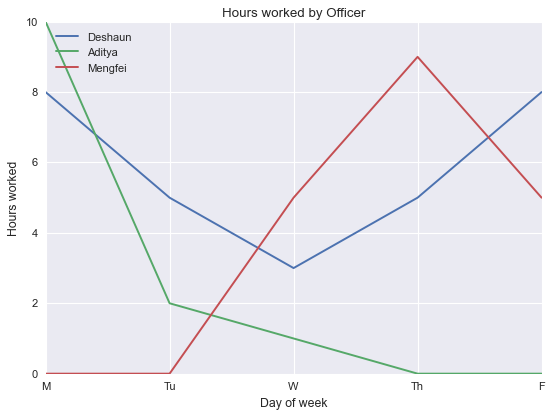

In [185]:
# Grafico oficial deshaun
plt.plot(deshaun.day_of_week, deshaun.hours_worked, label = 'Deshaun')
# Grafico oficial aditya
plt.plot(aditya.day_of_week, aditya.hours_worked, label = 'Aditya')
# Grafico oficial mengfei
plt.plot(mengfei.day_of_week, mengfei.hours_worked, label = 'Mengfei')
# Agregar leyenda 
plt.legend(loc = 'upper left')
# Agregar nombre de los ejes x e y
plt.xlabel('Day of week')
plt.ylabel('Hours worked')
# Agregar un titulo al grafico
plt.title('Hours worked by Officer')
# Llamar al grafico
plt.show()

### Estadísticas delictivas

La sargento Laura quiere investigar un poco los antecedentes para ayudarse a comprender mejor el contexto cultural del secuestro de Bayes. Trazó las tasas de robos en tres ciudades de EE. UU. usando datos de Uniform Crime Reporting Statistics. Quiere presentar estos datos a sus oficiales y quiere que la imagen sea lo más hermosa posible para contar su historia de datos de manera efectiva.

Recordar:

- Puede cambiar el estilo de línea a punteado (':'), discontinuo ('--') o sin línea ('').
- Puede cambiar el marcador a círculo ('o'), diamante ('d') o cuadrado ('s').

In [186]:
data = pd.read_csv('data.csv', sep=';')
data

,Year,Phoenix Police Dept,Los Angeles Police Dept,New York City Police Dept,Philadelphia Police Dept
0,2010,"1,08","0,46","0,21","0,71"
1,2011,"1,27","0,45","0,22","0,79"
2,2012,"1,21","0,43","0,22","0,78"
3,2013,"1,11","0,41","0,2","0,67"
4,2013,"0,94","0,39","0,19","0,62"


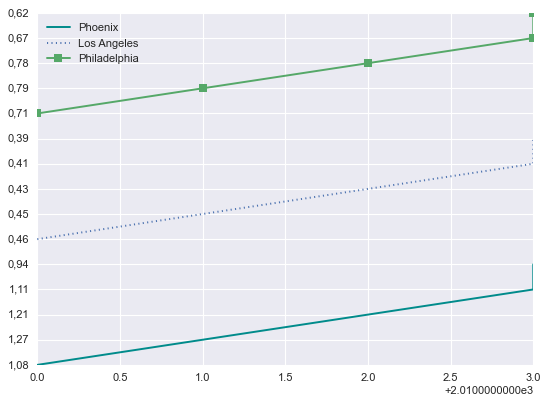

In [187]:
plt.plot(data["Year"], data["Phoenix Police Dept"], label="Phoenix", color="DarkCyan")
plt.plot(data["Year"], data["Los Angeles Police Dept"], label="Los Angeles", linestyle=":")
plt.plot(data["Year"], data["Philadelphia Police Dept"], label="Philadelphia", marker="s")
plt.legend(loc = 'upper left')
plt.show()

Cambiar el estilo es una forma rápida de cambiar el aspecto completo del gráfico sin tener que actualizar colores o estilos de línea individuales. Algunos estilos populares incluyen:

- 'fivethirtyeight' - Basado en el esquema de color del popular sitio web
- 'grayscale' - ¡Ideal para cuando no tienes una impresora a color!
- 'seaborn': basado en otra biblioteca de visualización de Python
- 'classic': el esquema de color predeterminado para Matplotlib

### Identificando al secuestrador de Bayes
Hemos reducido los posibles secuestradores a dos sospechosos:

- Fred frecuentista (sospechoso1)
- Gertrude Cox (sospechoso2)

El secuestrador dejó una larga nota de rescate que contenía varias frases inusuales. Ayude a DataCamp usando un diagrama de líneas para comparar la frecuencia de las letras en la nota de rescate con muestras de los dos principales sospechosos.

Inicialmente se habia cargado el dataframe ransom que contiene las frecuencias de las letras de la nota de rescate.

Ahora se cargaran los siguientes:

- suspect1: contiene las frecuencias de letras para la muestra de Fred Frequentist.
- suspect2: contiene las frecuencias de letras para la muestra de Gertrude Cox.

Cada DataFrame contiene dos columnas, letra y frecuencia.

In [188]:
suspect1 = pd.read_csv('suspect1.csv', sep=';')
suspect1.head(4)

,letter_index,letter,frequency
0,1,A,7.24
1,2,B,0.01
2,3,C,3.03
3,4,D,4.04


In [189]:
suspect2 = pd.read_csv('suspect2.csv', sep=';')
suspect2.head(4)

,letter_index,letter,frequency
0,1,A,8.167
1,2,B,1.492
2,3,C,2.782
3,4,D,4.253


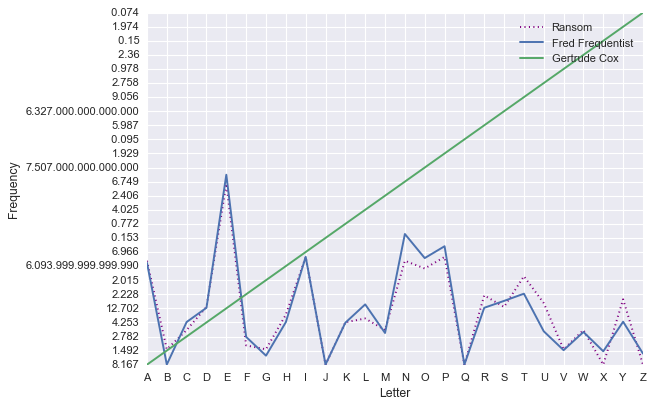

In [190]:
plt.style.use('seaborn')

plt.plot(ransom.letter, ransom.frequency, label='Ransom', linestyle=':', color='purple')
plt.plot(suspect1.letter, suspect1.frequency, label='Fred Frequentist')
plt.plot(suspect2.letter, suspect2.frequency, label='Gertrude Cox')
plt.xlabel("Letter")
plt.ylabel("Frequency")
plt.legend()
plt.show()

Sabemos entonces, que quien secuestró a Bayes fue **Fred Frequentist**. Ahora debemos saber dónde se esconde.

Nuestros amigos de la comisaría han adquirido datos de teléfonos móviles, que dan algunas de las ubicaciones de Freddie en las últimas tres semanas. Las ubicaciones se dan como un conjunto de coordenadas x e y en un mapa. Para visualizar estas coordenadas, usaremos un diagrama de dispersión.

Un diagrama de dispersión nos permite mostrar dónde se encuentra cada punto de datos en una cuadrícula. Los diagramas de líneas nos permiten visualizar puntos de datos ordenados, pero los diagramas de dispersión son una excelente manera de ver puntos no ordenados.

### Gráfico de datos de teléfonos móviles

In [191]:
cellphone = pd.read_csv('cellphone.csv', sep=';')
print(cellphone.head(5))

      X     Y
0  28.1  39.4
1  44.6  58.2
2  34.9  42.0
3  31.0  38.3
4  36.4  66.0


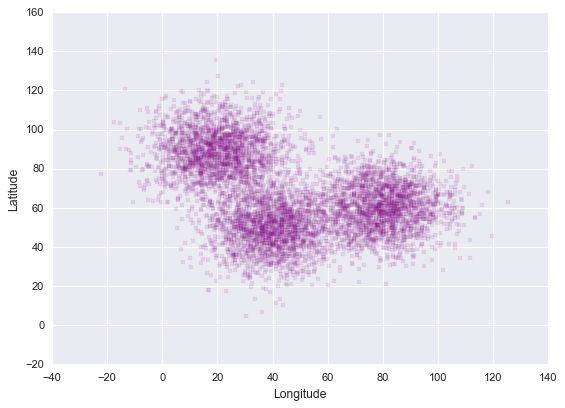

In [192]:
plt.scatter(cellphone['X'], cellphone['Y'], color='purple', marker="s", alpha=0.1)

plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.show()

### Construir un gráfico de barras simple

El oficial Deshaun quiere trazar la cantidad promedio de horas trabajadas por semana para él y sus compañeros de trabajo. Tiene almacenadas las horas trabajadas en un DataFrame llamado hours (columnas avg_hours_worked y std_hours_worked). 

Recuerde que la función plt.bar() toma dos argumentos: las etiquetas de cada barra y la altura de cada barra.

In [193]:
hours = pd.read_csv('hours.csv', sep=';')
hours

,officer,avg_hours_worked,std_hours_worked,desk_work,field_work
0,Deshaun,45,3,25,20
1,Mengfei,33,9,20,13
2,Aditya,42,5,12,30


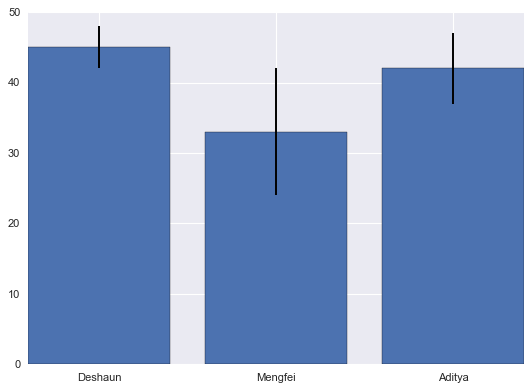

In [194]:
plt.bar(hours.officer, hours.avg_hours_worked,
        # Add error bars
        yerr=hours.std_hours_worked)

plt.show()

El oficial Deshaun quiere comparar las horas dedicadas al trabajo de campo y el trabajo de escritorio entre él y sus colegas (columnas desk_work y field_work).

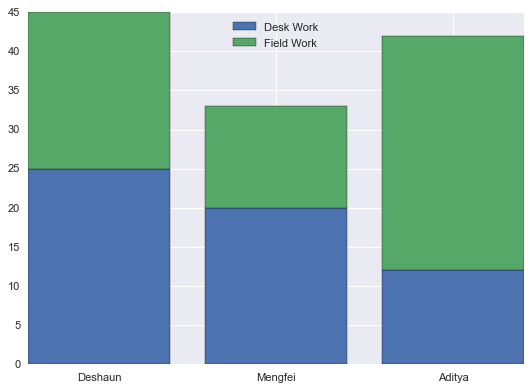

In [195]:
plt.bar(hours.officer, hours.desk_work, label='Desk Work')
# Plot the hours spent on field work on top of desk work
plt.bar(hours.officer, hours.field_work, label='Field Work', bottom = hours.desk_work)

plt.legend(loc = 'upper center')
plt.show()

Exploraremos cómo los cambios en los parámetros de palabras clave en un histograma pueden cambiar la salida. Recordar que:

- range: establece los puntos de datos mínimos y máximos que incluiremos en nuestro histograma.
- bins: establece el número de puntos en nuestro histograma.

Exploraremos los pesos de varios cachorros del DataFrame puppies.

In [196]:
puppies = pd.read_csv('puppies.csv', sep=';')
puppies.head(5)

,weight,breed
0,9.79,pitbull
1,11.70,pitbull
2,5.99,pug
3,14.20,pitbull
4,17.20,pitbull


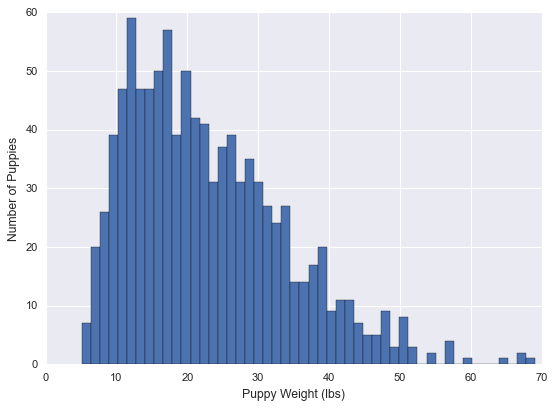

In [197]:
plt.hist(puppies['weight'], bins=50)

plt.xlabel('Puppy Weight (lbs)')
plt.ylabel('Number of Puppies')
plt.show()

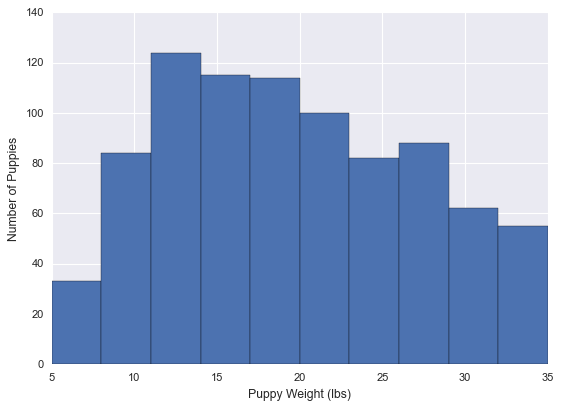

In [198]:
plt.hist(puppies['weight'], range=(5, 35))

plt.xlabel('Puppy Weight (lbs)')
plt.ylabel('Number of Puppies')
plt.show()

### ¿Dónde esconden a Bayes?
Hemos identificado que el secuestrador es Fred Frequentist. Ahora necesitamos saber dónde esconde Fred a Bayes.

Una huella de zapato en la escena del crimen contiene un tipo específico de grava. Según la distribución de los radios de grava, podemos determinar dónde visitó recientemente el secuestrador. Puede ser:

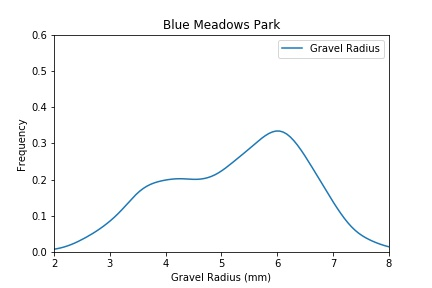
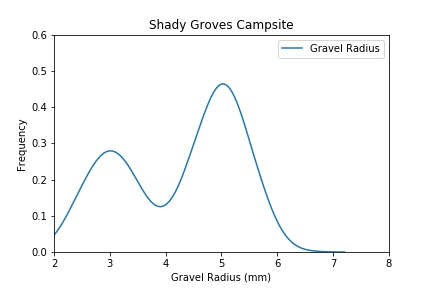
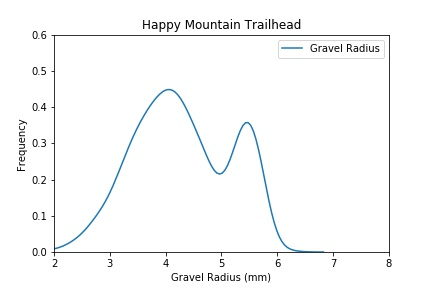

In [199]:
gravel = pd.read_csv('gravel.csv', sep=';')
gravel.head(5)

,sample_id,radius
0,0.0,4.95
1,1.0,4.50
2,2.0,5.04
3,3.0,4.67
4,4.0,5.00


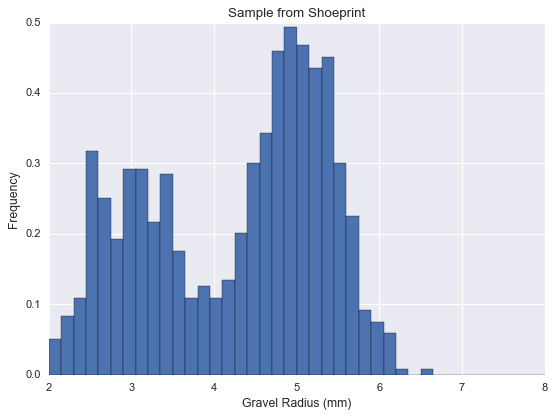

In [200]:
plt.hist(gravel.radius, bins=40, range=(2, 8), density=True)

plt.xlabel('Gravel Radius (mm)')
plt.ylabel('Frequency')
plt.title('Sample from Shoeprint')

plt.show()

Por el comportamiento del histograma, descrubrimos entonces que Freddy Frequentist secuestró a Bayes el Golden Retriever y lo estaba escondiendo en el campamento Shady Groves.